In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
anoDeConsulta = "2020"
regiaoAConsultar = "Região 1"

In [3]:
dicionarioMeses = {
    1: "Janeiro", 
    2: "Fevereiro", 
    3: "Março", 
    4: "Abril", 
    5: "Maio", 
    6: "Junho", 
    7: "Julho", 
    8: "Agosto",
    9: "Setembro", 
    10: "Outubro", 
    11: "Novembro", 
    12: "Dezembro"
}

def pegarNomeMes(numeroMes):
    return dicionarioMeses[numeroMes]

In [4]:
dicionarioDeDados = {
    "sexo": {
        1: "Homem",
        3: "Mulher",
        9: "Não identificado"
    },
    "tipomovimentação": {
        "Admissão": {
            10: "Admissão por primeiro emprego",
            20: "Admissão por reemprego,",
            25: "Admissão por contrato trabalho prazo determinado",
            35: "Admissão por reintegração",
            70: "Admissão por transferência"
        },
        "Demissão": {
            31: "Desligamento por demissão sem justa causa",
            32: "Desligamento por demissão com justa causa",
            33: "Culpa Recíproca",
            40: "Desligamento a pedido",
            43: "Término contrato trabalho prazo determinado",
            45: "Desligamento por Término de contrato",
            50: "Desligamento por aposentadoria",
            60: "Desligamento por morte",
            80: "Desligamento por transferência",
            90: "Desligamento por Acordo entre empregado e empregador",
            98: "Desligamento de Tipo Ignorado"
        }
        #99: "Não Identificado"
    },
    "município": {
        "Região 1": {
            350850: "Caçapava",            # Grupo 1
            352020: "Igaratá",             # Grupo 1
            352440: "Jacareí",             # Grupo 1
            352490: "Jambeiro",            # Grupo 1
            353170: "Monteiro Lobato",     # Grupo 1
            353560: "Paraíbuna",           # Grupo 1
            354600: "Santa Branca",        # Grupo 1
            354990: "São José dos Campos", # Grupo 1
        },
        "Região 2": {
            350970: "Campos do Jordão",        # Grupo 2
            352630: "Lagoinha",                # Grupo 2
            353230: "Natividade da Serra",     # Grupo 2
            353800: "Pindamonhangaba",         # Grupo 2
            354230: "Redenção da Serra",       # Grupo 2
            354820: "Santo Antônio do Pinhal", # Grupo 2
            354860: "São Bento do Sapucaí",    # Grupo 2
            355000: "São Luiz do Paraitinga",  # Grupo 2
            355410: "Taubaté",                 # Grupo 2
            355480: "Tremembé",                # Grupo 2
        },
        "Região 3": {
            350250: "Aparecida",          # Grupo 3
            350860: "Cachoeira Paulista", # Grupo 3
            350995: "Canas",              # Grupo 3
            351360: "Cunha",              # Grupo 3
            351840: "Guaratinguetá",      # Grupo 3
            352720: "Lorena",             # Grupo 3
            353850: "Piquete",            # Grupo 3
            354075: "Potim",              # Grupo 3
            354430: "Roseira",            # Grupo 3
        },
        "Região 4": {
            350315: "Arapeí",               # Grupo 4
            350350: "Areias",               # Grupo 4
            350490: "Bananal",              # Grupo 4
            351340: "Cruzeiro",             # Grupo 4
            352660: "Lavrinhas",            # Grupo 4
            354190: "Queluz",               # Grupo 4
            354960: "São José do Barreiro", # Grupo 4
            355200: "Silveiras",            # Grupo 4
        },
        "Região 5": {
            351050: "Caraguatatuba", # Grupo 5
            352040: "Ilhabela",      # Grupo 5
            355070: "São Sebastião", # Grupo 5
            355540: "Ubatuba"        # Grupo 5
        }
    },
    "raçacor": {
        1: "Branca",
        2: "Preta",
        3: "Parda",
        4: "Amarela",
        5: "Indígena",
        6: "Não informada",
        9: "Não Identificado"
    }
}

In [5]:
def lerTabelasDiretorio(ano, colunasUtilizaveis):
    caminhoDados = "../doc/Dados/CAGED"
    
    fonteDados = os.listdir(caminhoDados + "/" + ano)
    
    # Retira os arquivos que não são do tipo .txt da lista
    for arquivo in fonteDados:
        if ".txt" not in arquivo:
            del fonteDados[fonteDados.index(arquivo)]
            
    tabelas = {}
    
    for nomeTabela in fonteDados:
        valorMes = int(nomeTabela.split(".")[0][-2:])  # Pega os dois últimos valores do nome do arquivo, que representam o mês e converte para um inteiro
        nomeMes = pegarNomeMes(valorMes)
        tabelas[nomeMes] = pandas.read_csv(caminhoDados + "/" + ano + "/" + nomeTabela,
                                           delimiter=";",
                                           usecols=colunasUtilizaveis)
        
    return tabelas

In [6]:
colunasUtilizaveis = ["sexo", "tipomovimentação", "município", "raçacor", "idade"]

dados = lerTabelasDiretorio(anoDeConsulta, colunasUtilizaveis)

In [7]:
def organizarPorRegiao(dadosCrus):
    novosDados = {}
    
    for mes in dadosCrus:
        for grupoRegiao in dicionarioDeDados["município"]:
            for codigoRegiao in dicionarioDeDados["município"][grupoRegiao]:
                nomeMunicipio = dicionarioDeDados["município"][grupoRegiao][codigoRegiao]
                
                mascara = dadosCrus[mes]["município"] == codigoRegiao
                
                filtrado = dadosCrus[mes][mascara]
                
                if grupoRegiao not in novosDados:
                    novosDados[grupoRegiao] = {
                        nomeMunicipio: {
                            mes: filtrado
                        }
                    }
                elif nomeMunicipio not in novosDados[grupoRegiao]:
                    novosDados[grupoRegiao][nomeMunicipio] = {
                        mes: filtrado
                    }
                else:
                    novosDados[grupoRegiao][nomeMunicipio][mes] = filtrado
        
    return novosDados

In [8]:
dadosPorRegiao = organizarPorRegiao(dados)

In [9]:
regiaoParaAnalisar = dadosPorRegiao[regiaoAConsultar]

In [10]:
def organizarPorTipoDemissao(dadosRegiao):
    novosDados = {}
    
    for municipio in dadosRegiao:
        novosDadosMunicipio = {}
        
        for mes in dadosRegiao[municipio]:
            dadosMes = {}
            grupo = dadosRegiao[municipio][mes].groupby(["tipomovimentação"])
            
            # Garante que tenha todos os tipos para facilitar a plotagem no gráfico, mesmo que seja 0
            for codigo in dicionarioDeDados["tipomovimentação"]["Demissão"]:
                tipo = dicionarioDeDados["tipomovimentação"]["Demissão"][codigo]
                dadosMes[tipo] = 0
                
            for chave, valor in grupo:
                codigoDemissao = int(valor.sample()["tipomovimentação"])
                
                if codigoDemissao in dicionarioDeDados["tipomovimentação"]["Demissão"]:
                    tipoDemissao = dicionarioDeDados["tipomovimentação"]["Demissão"][codigoDemissao]
                    total = valor.count().values[0]
                    
                    dadosMes[tipoDemissao] = total;
                    
            novosDadosMunicipio[mes] = dadosMes;
        
        novosDados[municipio] = novosDadosMunicipio
    return novosDados

In [11]:
dadosOrganizadosPorDemissao = organizarPorTipoDemissao(regiaoParaAnalisar)

In [12]:
def plotarGraficosBarra(dadosOrganizados):
    for municipio in dadosOrganizados:
        fig, ax = plt.subplots()
        meses = []
        rects = []
        dados = {}
        
        for mes in dadosOrganizados[municipio]:
            meses.append(mes)
            
            for tipo in dadosOrganizados[municipio][mes]:
                if tipo not in dados:
                    dados[tipo] = []
                
                valorMes = dadosOrganizados[municipio][mes][tipo]
                dados[tipo].append(valorMes)
            
        x = numpy.arange(len(dados) + 1)
        espacamento = -0.30
        area = 0.05
        for tipo in dados:
            rect = ax.bar(x + espacamento, dados[tipo], width=area, label=tipo)
            espacamento += area + 0.03
            rects.append(rect)
            
        ax.legend(loc='upper center', borderaxespad=0, fontsize='xx-small', ncol=2)
        
        ticksMeses = numpy.arange(len(meses))
        
        ax.set_xticks(ticksMeses)
        ax.set_xticklabels(meses)

        for rect in rects:
            ax.bar_label(rect, padding=3)

        fig.tight_layout()
        
        fig.set_figwidth(18)
        fig.set_figheight(5)
        
        plt.grid(axis = 'y')
        
        plt.title("Demissões por tipos para o munícipio de " + municipio + "\n" + anoDeConsulta + "\n")
        
        plt.xlabel("Mês")
        plt.ylabel("Quantia de demissões")

        plt.show()

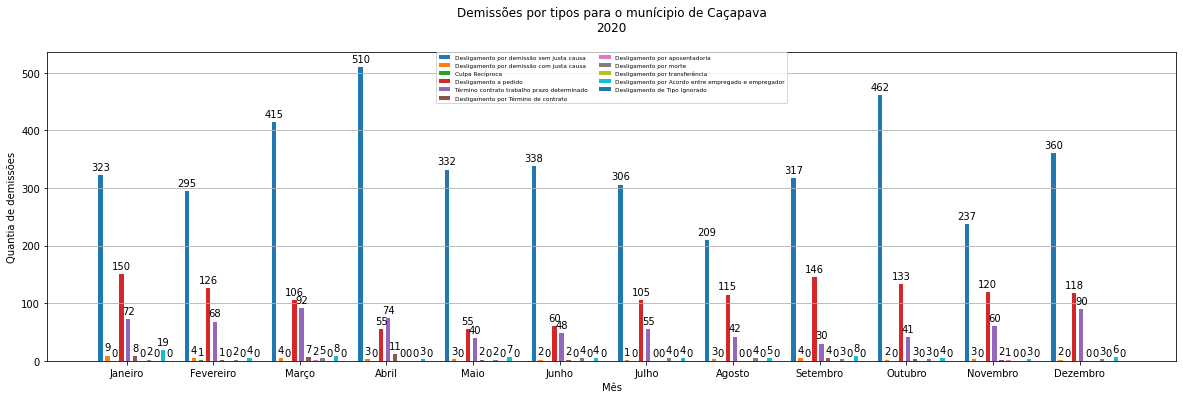

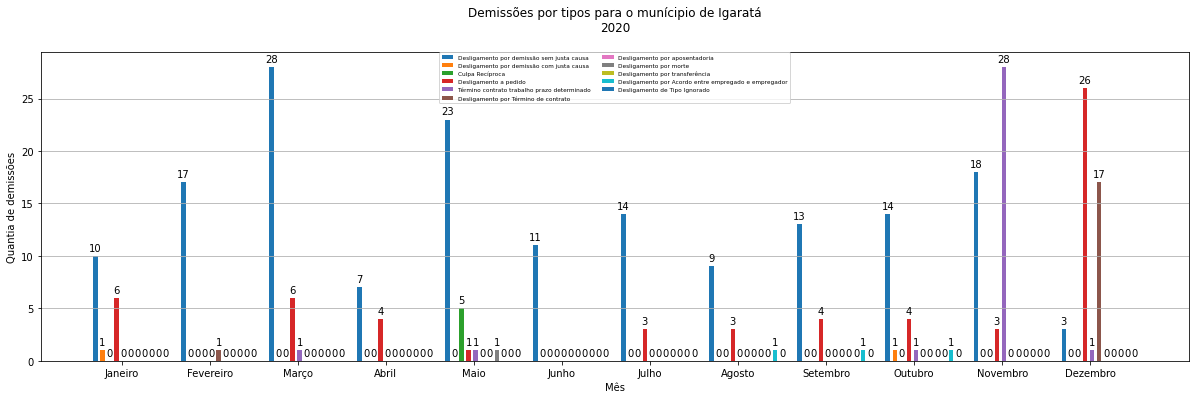

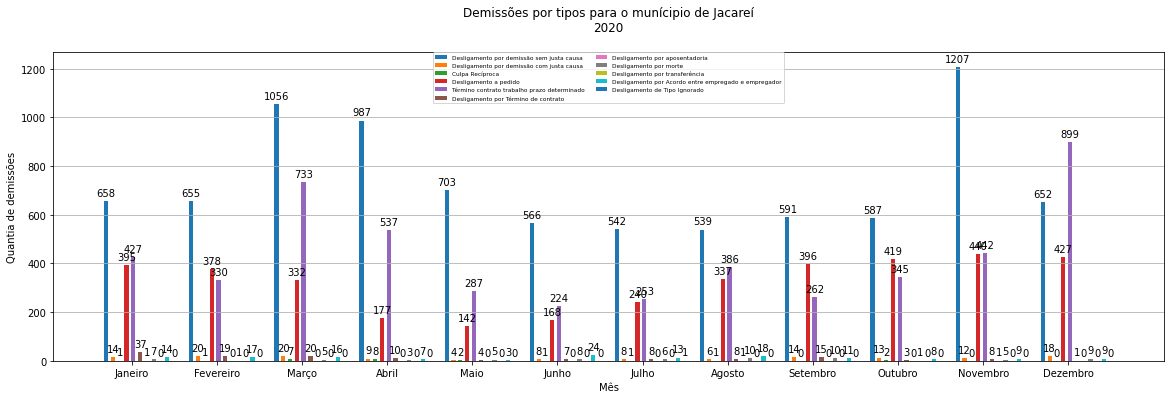

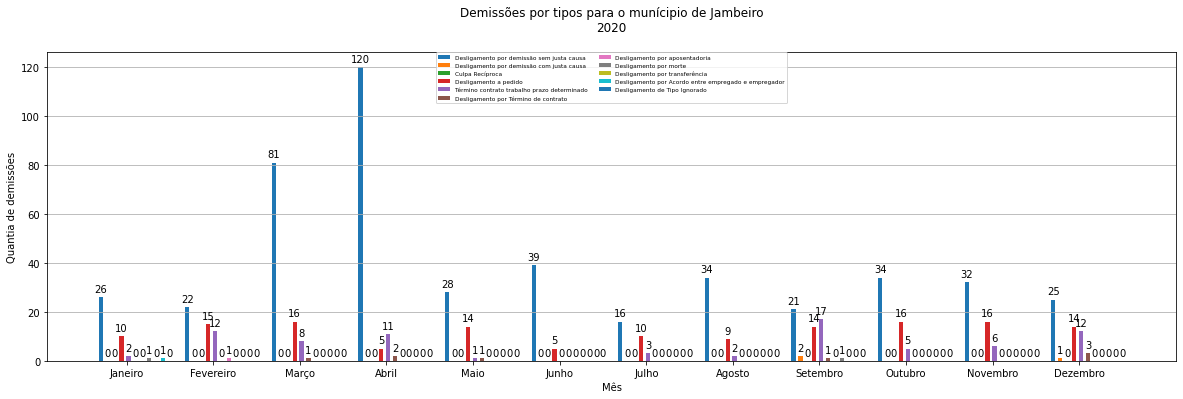

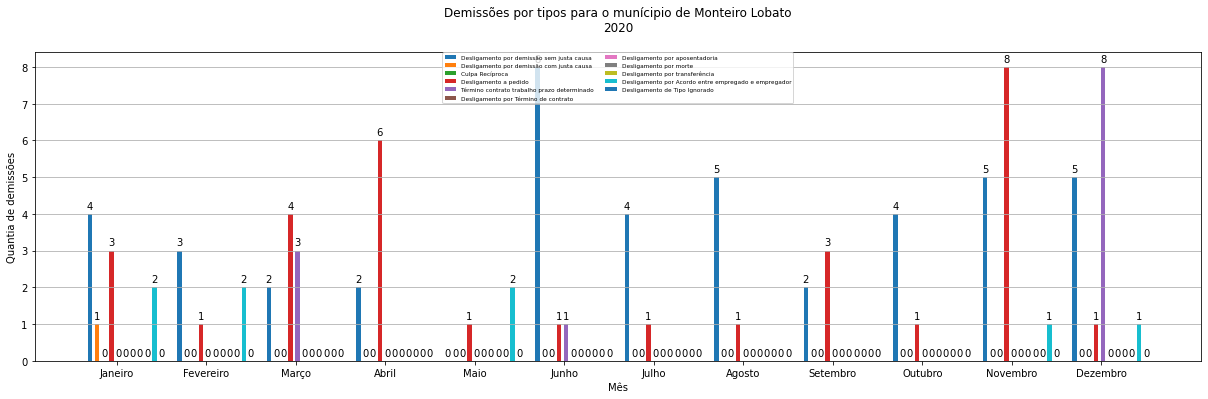

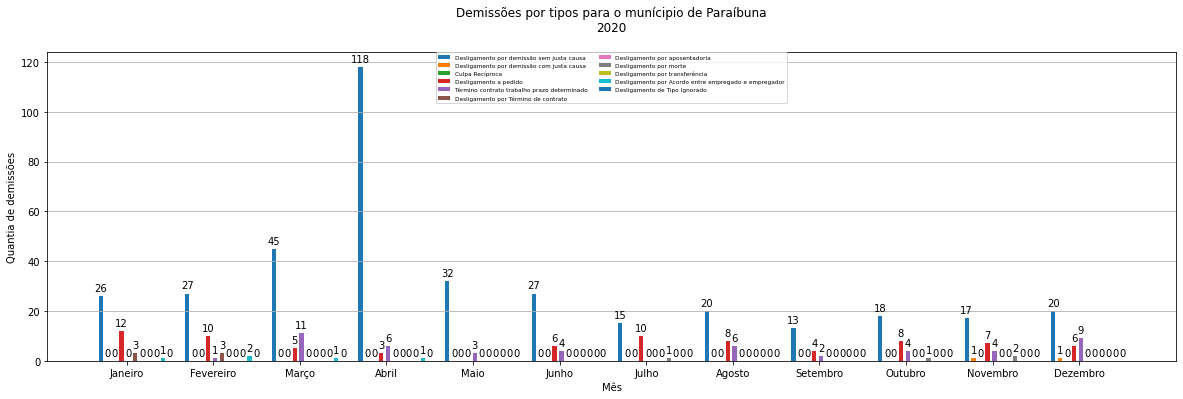

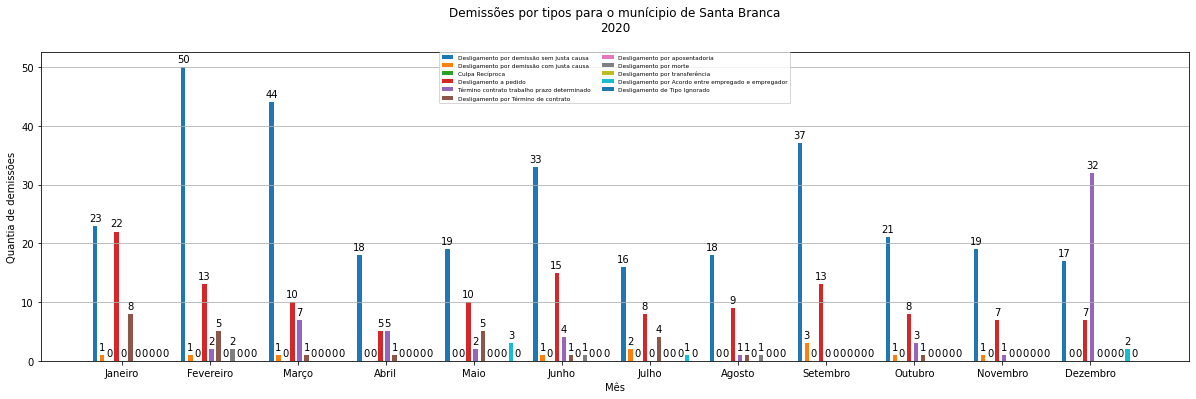

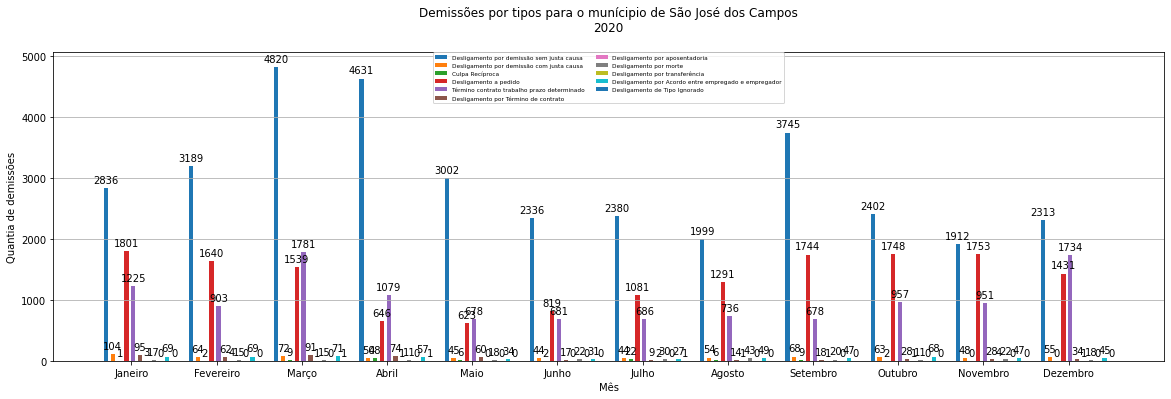

In [13]:
plotarGraficosBarra(dadosOrganizadosPorDemissao)